In [1]:
import sys
import numpy as np
from numpy import mean
from numpy import std

import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.set_style("ticks")

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import FormatStrFormatter

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# Add parent directory to path to allow import of config.py
sys.path.append("..")

import config as conf

First modeling strategy attempted will be a simple linear model which predicts the next term's enrollment based on all of the previous term's data.

In [2]:
data = pd.read_csv(f'{conf.DATA_PATH}{conf.FORMATTED_DATAFILE}')

# Seperate independent & dependent variables
X = data.drop('Next Semester Census Enrollment', axis=1)
y = data['Next Semester Census Enrollment']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Census Enrollment                14 non-null     float64
 1   Census Fill Rate                 14 non-null     float64
 2   Count of Migrated Data           14 non-null     float64
 3   Current Enrollment               14 non-null     float64
 4   Current Fill Rate                14 non-null     float64
 5   Enrollment Capacity              14 non-null     float64
 6   Ftef                             14 non-null     float64
 7   Ftes                             14 non-null     float64
 8   Ftes/Ftef                        14 non-null     float64
 9   Number Retained                  14 non-null     float64
 10  Number Successful                14 non-null     float64
 11  Retention Rate                   14 non-null     float64
 12  Sec. Count              

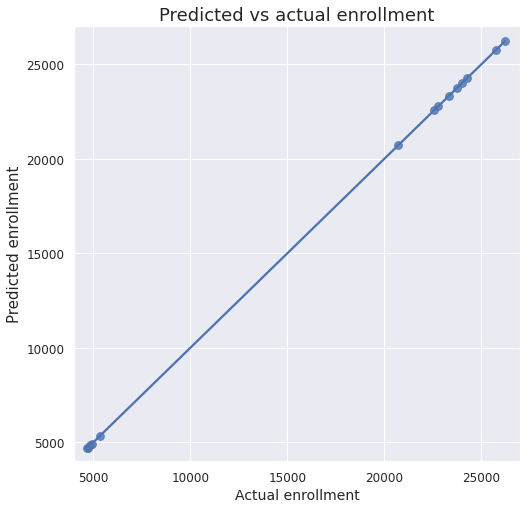

In [3]:
# Create and fit a LinearRegression object
lm = LinearRegression()
linear_model = lm.fit(X, y)

# Predict enrollment
predicted_enrollment = lm.predict(X)

# Grab actual enrollment numbers to compare with
actual_enrollment = y

# Plot actual enrollment vs predicted enrollment
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.regplot(y=predicted_enrollment, x=actual_enrollment, fit_reg=True, scatter_kws={'s':60})
ax.tick_params(labelsize=12)
ax.set_title('Predicted vs actual enrollment', fontsize=18)
ax.set_xlabel('Actual enrollment', fontsize=14)
ax.set_ylabel('Predicted enrollment', fontsize=15)
#ax.set_aspect('equal', 'box')
ax.set_xlim(4000, 27000)
ax.set_ylim(4000, 27000)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [4]:
scikit_R_sqr = linear_model.score(X, actual_enrollment)
print('SciKit-learn R\u00b2: {}'.format(np.round(scikit_R_sqr, 3)))

SciKit-learn R²: 1.0


In [ ]:
# Instantiate base bagging model using linear regression
bagging_model = BaggingRegressor(
    LinearRegression(),
    n_estimators=50,
    max_samples=7,
    n_jobs=8,
    random_state=123
)

# Setup and k-fold cross validation
cv = RepeatedKFold(
    n_splits=2,
    n_repeats=500,
    random_state=1
)

# Score model
n_scores = cross_val_score(bagging_model, X, y, cv=cv, scoring='neg_mean_absolute_error')
MAEs = abs(n_scores)

# Report average performance
print('MAE: %.3f (%.3f)' % (abs(mean(n_scores)), std(n_scores)))

In [ ]:
# Plot distribution of MAE scores from each k-fold
sns.displot(MAEs, kind="kde")
plt.tick_params(labelsize=12)
plt.xlabel('Mean absolute error', fontsize=14)

plt.show()

In [ ]:
# Fit the model on the whole dataset
bagging_model.fit(X, y)

# Predict
predicted_enrollment = bagging_model.predict(X)

# Plot actual enrollment vs predicted enrollment
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.regplot(y=predicted_enrollment, x=actual_enrollment, fit_reg=True, scatter_kws={'s':60})
ax.tick_params(labelsize=12)
ax.set_title('Predicted vs actual enrollment', fontsize=18)
ax.set_xlabel('Actual enrollment', fontsize=14)
ax.set_ylabel('Predicted enrollment', fontsize=15)
ax.set_xlim(4000, 27000)
ax.set_ylim(-10000, 27000)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))